# Regressão

# Sobre o Conjunto de Dados

O Conjunto de Dados de Desempenho Estudantil reúne 10 000 registros de alunos, cada um contendo informações sobre variáveis preditoras e um índice de desempenho acadêmico. As variáveis incluem:

* **Horas de Estudo**: total de horas dedicadas aos estudos.
* **Notas Anteriores**: pontuações em provas realizadas anteriormente.
* **Atividades Extracurriculares**: participação (Sim ou Não).
* **Horas de Sono**: média diária de horas dormidas.
* **Provas Modelo Praticadas**: quantidade de questões/práticas respondidas.

A variável-alvo é o **Índice de Desempenho**, um valor inteiro entre 10 e 100 (quanto maior, melhor), que sintetiza o rendimento acadêmico do estudante. Esse conjunto de dados permite explorar como cada um desses fatores se relaciona com o desempenho geral.


source = [link](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

# Análise exploratória

https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

In [ ]:
import kagglehub

path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

print("Path to dataset files:", path)

import os
os.listdir(path)
path = path + "/" + os.listdir(path)[0]

Path to dataset files: /kaggle/input/student-performance-multiple-linear-regression


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
students = pd.read_csv(path)
students.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


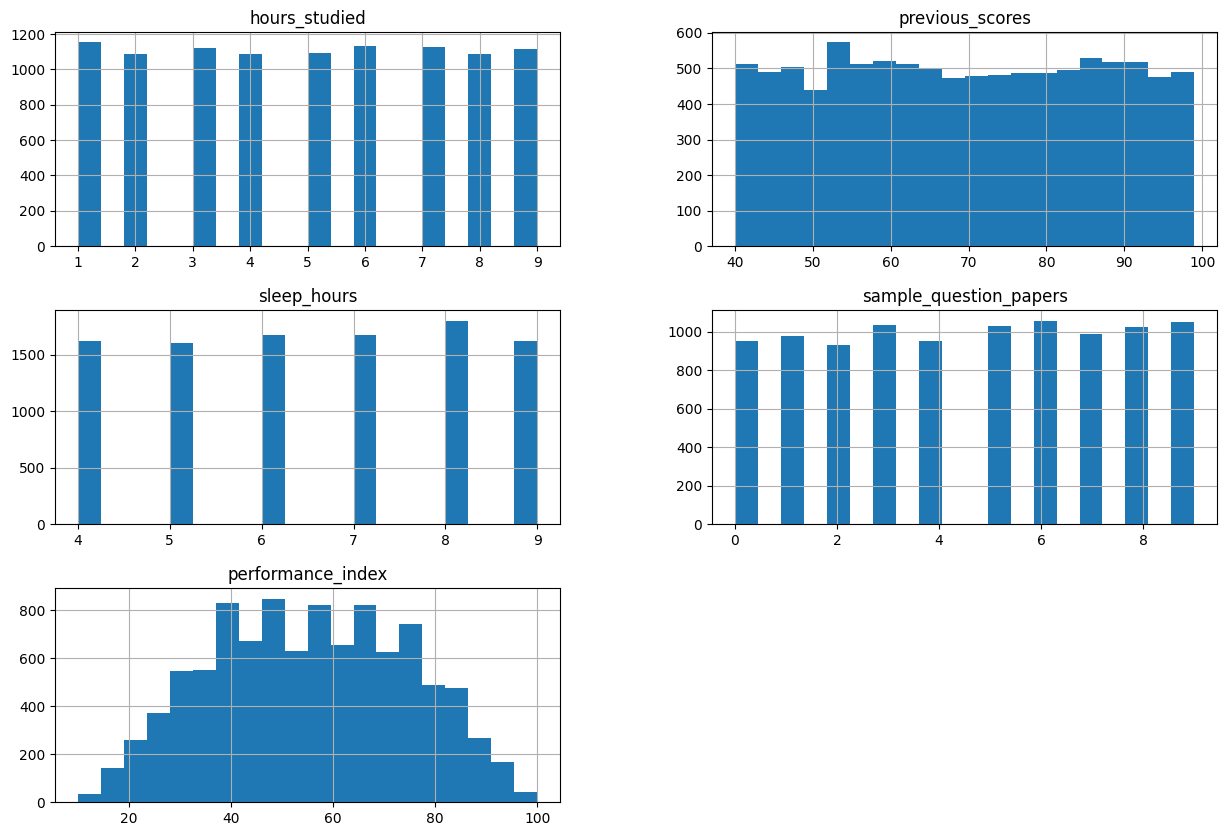

In [ ]:
students.columns = ['hours_studied', 'previous_scores', 'extracurricular', 'sleep_hours', 'sample_question_papers', 'performance_index']
students.hist(bins=20, figsize=(15,10));

In [ ]:
students.info()
students.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hours_studied           10000 non-null  int64  
 1   previous_scores         10000 non-null  int64  
 2   extracurricular         10000 non-null  object 
 3   sleep_hours             10000 non-null  int64  
 4   sample_question_papers  10000 non-null  int64  
 5   performance_index       10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,hours_studied,previous_scores,sleep_hours,sample_question_papers,performance_index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
print(students.isna().sum())
print(students.isnull().sum())


hours_studied             0
previous_scores           0
extracurricular           0
sleep_hours               0
sample_question_papers    0
performance_index         0
dtype: int64
hours_studied             0
previous_scores           0
extracurricular           0
sleep_hours               0
sample_question_papers    0
performance_index         0
dtype: int64


In [ ]:
le = LabelEncoder()
students['extracurricular'] = le.fit_transform(students['extracurricular'])

In [ ]:
students.head()

,hours_studied,previous_scores,extracurricular,sleep_hours,sample_question_papers,performance_index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


<Axes: >

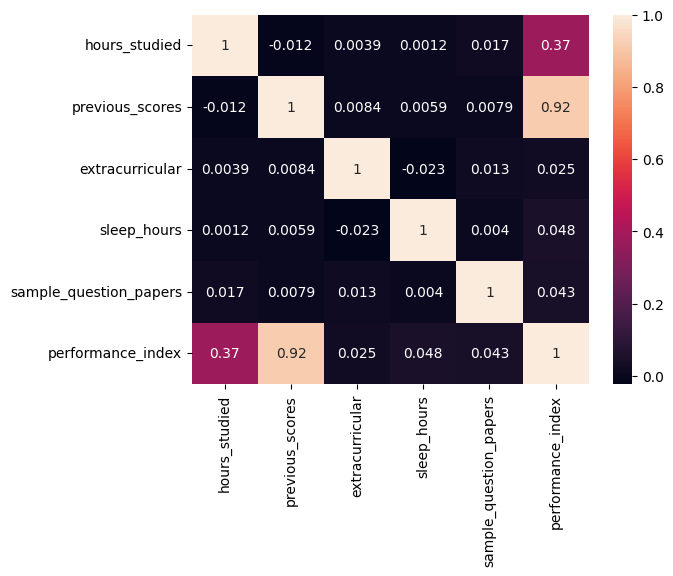

In [ ]:
import seaborn as sns

sns.heatmap(students.corr(), annot=True)

In [ ]:
X = students.drop('performance_index', axis=1)
y = students['performance_index']


In [ ]:
X.shape, y.shape

((10000, 5), (10000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R²:  {r2:.4f}")

MSE: 8.5626
R²:  0.9769


In [ ]:
#validação cruzada

import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_squared_error


knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors': list(range(1, 21, 2)),
    'weights': ['uniform', 'distance']
}


cv = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(mean_squared_error, greater_is_better=False)


grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    return_train_score=True,
    n_jobs=-1
)

#
grid.fit(X_train_scaled, y_train)

print("Melhor parâm.:", grid.best_params_)
print("Melhor MSE (CV):", -grid.best_score_)


Melhor parâm.: {'n_neighbors': 17, 'weights': 'distance'}
Melhor MSE (CV): 7.931734459359838


# Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


y_pred = lr.predict(X_test_scaled)


mse   = mean_squared_error(y_test, y_pred)
mae   = mean_absolute_error(y_test, y_pred)
r2    = r2_score(y_test, y_pred)
rmse  = mse ** 0.5

print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")




MSE:  4.0826
RMSE: 2.0206
MAE:  1.6111
R²:   0.9890


In [ ]:
# cross validation
cv_mse = -cross_val_score(lr, X_train_scaled, y_train,
                          scoring='neg_mean_squared_error', cv=5)
cv_mae = -cross_val_score(lr, X_train_scaled, y_train,
                          scoring='neg_mean_absolute_error', cv=5)
cv_r2  =  cross_val_score(lr, X_train_scaled, y_train,
                          scoring='r2', cv=5)

print("\nMétricas por validação cruzada (5 folds):")
print(f"MSE médio:  {cv_mse.mean():.4f} ± {cv_mse.std():.4f}")
print(f"MAE médio:  {cv_mae.mean():.4f} ± {cv_mae.std():.4f}")
print(f"R² médio:   {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")


Métricas por validação cruzada (5 folds):
MSE médio:  4.1790 ± 0.0992
MAE médio:  1.6212 ± 0.0198
R² médio:   0.9887 ± 0.0003
